**IMPORTING LIBRARIES**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

**LOADING DATASET**

In [3]:
df_train = pd.read_csv("E:\SEM 6\Minorproject\IndoorLocalization\Inputdata\TrainingData.csv")
df_val = pd.read_csv("E:\SEM 6\Minorproject\IndoorLocalization\Inputdata\ValidationData.csv")

In [4]:
df_train.shape

(19937, 529)

In [5]:
df_val.shape

(1111, 529)

In [15]:
df_all = pd.concat([df_train, df_val])

In [16]:
df_all.columns

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP520', 'LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'],
      dtype='object', length=529)

In [17]:
df_all.shape

(21048, 529)

**FEATURES REPRESENTATION AND DATA VISUALIZATION**

In [18]:
unique_floors = np.sort(df_all["FLOOR"].unique())
unique_bldgs = np.sort(df_all["BUILDINGID"].unique())
unique_spaceid = np.sort(df_all["SPACEID"].unique())
unique_rpos = np.sort(df_all["RELATIVEPOSITION"].unique())
unique_users = np.sort(df_all["USERID"].unique())
unique_phones = np.sort(df_all["PHONEID"].unique())
print("Unique Floors : {}".format(unique_floors))
print("Unique Buildings : {}".format(unique_bldgs))
print("Unique Space IDs : {}".format(unique_spaceid))
print("Unique Relative Positions : {}".format(unique_rpos))
print("Unique User IDs : {}".format(unique_users))
print("Unique Phone IDs : {}".format(unique_phones))

Unique Floors : [0 1 2 3 4]
Unique Buildings : [0 1 2]
Unique Space IDs : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  22  25  26  27  28  29  30 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 146 147
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 242 243 244 245 246 247 248 249 250 253 254]
Unique Relative Positions : [0 1 2]
Unique Users : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
Unique Phones : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


In [40]:
print(f"There are total {df_all['USERID'].nunique()} different users.")
print(f"List of user ids: {sorted(df_all['USERID'].unique())}")
print(f"Entries per user:\n{df_all['USERID'].value_counts().sort_index()}")

There are total 19 different users.
List of user ids: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
Entries per user:
USERID
0     1111
1     2737
2     1091
3      192
4      374
5      610
6      980
7     1383
8      507
9     1066
10     913
11    4516
12     437
13     841
14    1596
15     498
16    1032
17     724
18     440
Name: count, dtype: int64


C:\Users\KIIT\AppData\Local\Temp\ipykernel_24120\3912488561.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=user_id_counts.index, y=user_id_counts.values, palette='viridis')


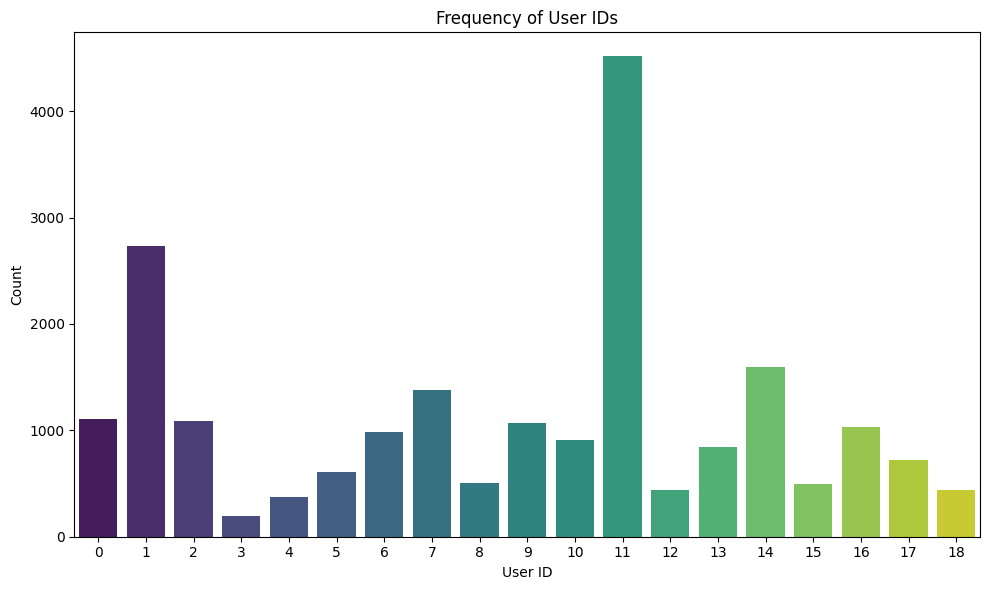

In [53]:
# Get unique phone IDs and their counts
user_id_counts = df_all['USERID'].value_counts().sort_index()

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=user_id_counts.index, y=user_id_counts.values, palette='viridis')
plt.xlabel('User ID')
plt.ylabel('Count')
plt.title('Frequency of User IDs')
plt.tight_layout()
plt.show()


In [41]:
print(f"There are total {df_all['PHONEID'].nunique()} different phones used.")
print(f"List of phone ids: {sorted(df_all['PHONEID'].unique())}")
print(f"Entries per phone:\n{df_all['PHONEID'].value_counts().sort_index()}")

There are total 25 different phones used.
List of phone ids: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
Entries per phone:
PHONEID
0      120
1      507
2       52
3      610
4       69
5       17
6     1383
7     1596
8      913
9       77
10     440
11     498
12      70
13    4885
14    4863
15      36
16     192
17     841
18     374
19     980
20     213
21      60
22     724
23    1091
24     437
Name: count, dtype: int64


C:\Users\KIIT\AppData\Local\Temp\ipykernel_24120\1421974125.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phone_id_counts.index, y=phone_id_counts.values, palette='viridis')


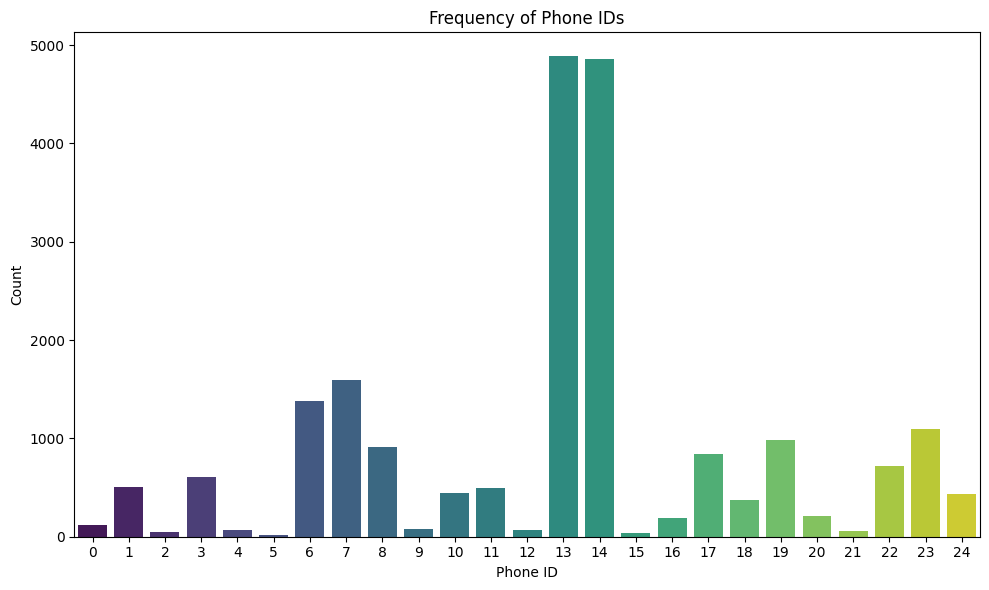

In [52]:
# Get unique phone IDs and their counts
phone_id_counts = df_all['PHONEID'].value_counts().sort_index()

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=phone_id_counts.index, y=phone_id_counts.values, palette='viridis')
plt.xlabel('Phone ID')
plt.ylabel('Count')
plt.title('Frequency of Phone IDs')
plt.tight_layout()
plt.show()


In [25]:
print(f"Which User uses by which Phone: \n {df_all.groupby('USERID')['PHONEID'].unique()}")

Which User uses by which Phone: 
 USERID
0     [0, 13, 2, 12, 20, 21, 4, 9, 15, 5, 14]
1                                        [14]
2                                        [23]
3                                        [16]
4                                        [18]
5                                         [3]
6                                        [19]
7                                         [6]
8                                         [1]
9                                        [14]
10                                        [8]
11                                       [13]
12                                       [24]
13                                       [17]
14                                        [7]
15                                       [11]
16                                       [14]
17                                       [22]
18                                       [10]
Name: PHONEID, dtype: object


In [26]:
print(f"Which Phone used by which User: \n {df_all.groupby('PHONEID')['USERID'].unique()}")

Which Phone used by which User: 
 PHONEID
0               [0]
1               [8]
2               [0]
3               [5]
4               [0]
5               [0]
6               [7]
7              [14]
8              [10]
9               [0]
10             [18]
11             [15]
12              [0]
13          [11, 0]
14    [9, 16, 1, 0]
15              [0]
16              [3]
17             [13]
18              [4]
19              [6]
20              [0]
21              [0]
22             [17]
23              [2]
24             [12]
Name: USERID, dtype: object


In [28]:
print(f"Number of floors in each building:\n{df_all.sort_values(['FLOOR']).groupby('BUILDINGID')['FLOOR'].unique()}")

Number of floors in each building:
BUILDINGID
0       [0, 1, 2, 3]
1       [0, 1, 2, 3]
2    [0, 1, 2, 3, 4]
Name: FLOOR, dtype: object


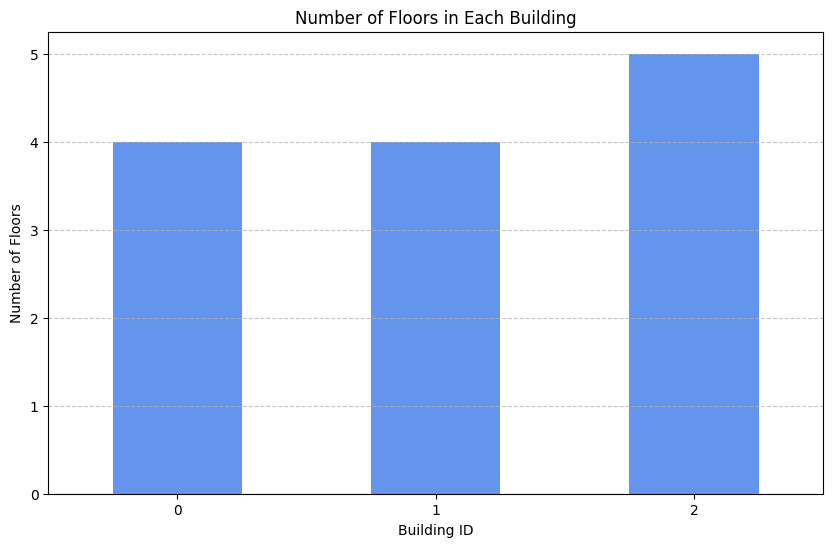

In [61]:
# Grouping the data by BUILDINGID and counting unique FLOOR values
building_floor_counts = df_all.groupby('BUILDINGID')['FLOOR'].nunique()

# Plotting
plt.figure(figsize=(10, 6))
building_floor_counts.plot(kind='bar', color='cornflowerblue')
plt.xlabel('Building ID')
plt.ylabel('Number of Floors')
plt.title('Number of Floors in Each Building')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [42]:
temp = df_all.sort_values(['BUILDINGID']).groupby('USERID')['BUILDINGID'].unique()
print(f"List of all buildings visited by each user:\n{temp}")

List of all buildings visited by each user:
USERID
0     [0, 1, 2]
1           [0]
2        [1, 2]
3           [2]
4           [1]
5           [2]
6           [2]
7        [1, 2]
8        [1, 2]
9        [1, 2]
10       [1, 2]
11    [0, 1, 2]
12          [2]
13       [1, 2]
14       [1, 2]
15          [2]
16       [1, 2]
17       [1, 2]
18       [1, 2]
Name: BUILDINGID, dtype: object


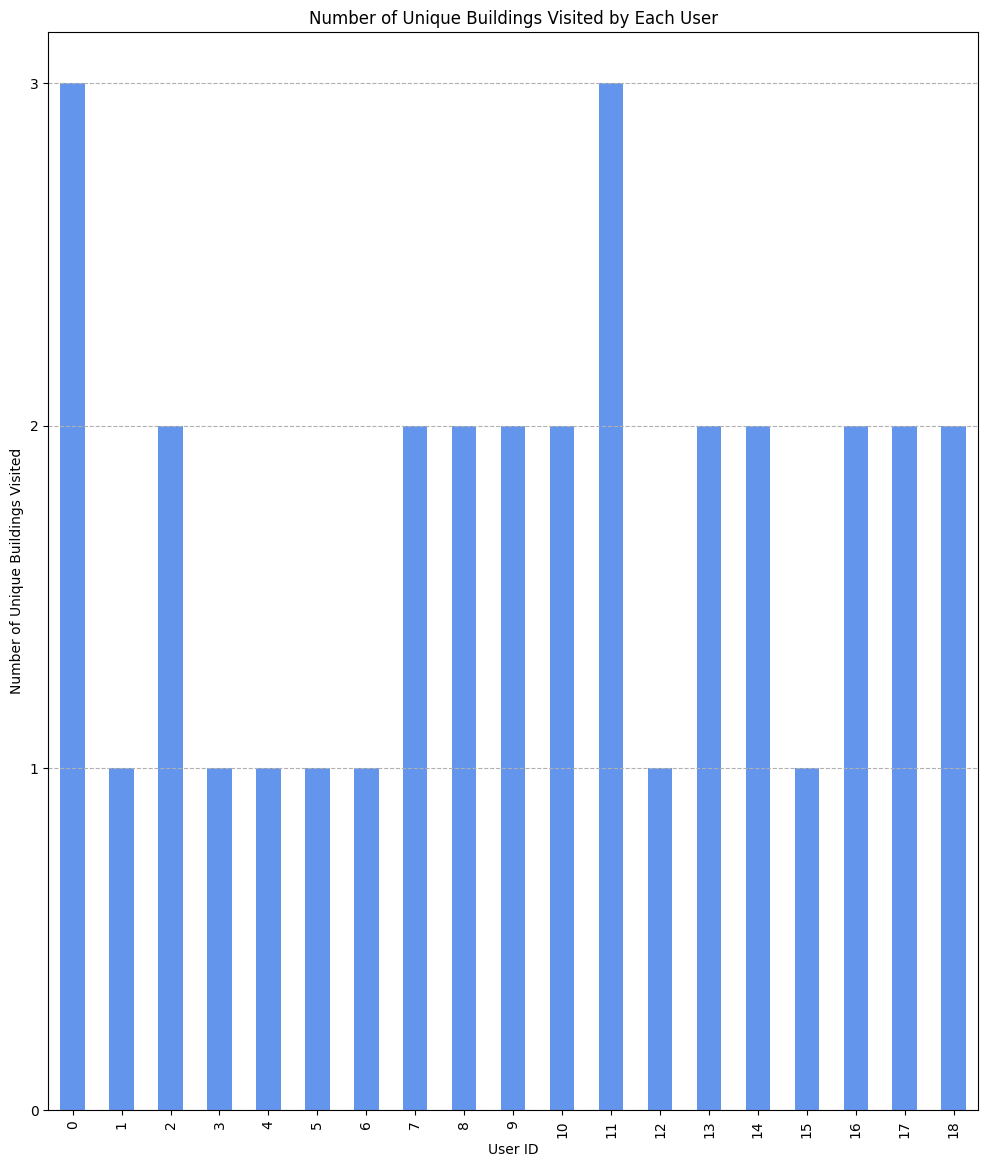

In [71]:
# Calculating the number of unique buildings visited by each user
user_building_counts = df_all.groupby('USERID')['BUILDINGID'].nunique()

# Plotting
plt.figure(figsize=(12, 14))
user_building_counts.plot(kind='bar', color='cornflowerblue')
plt.xlabel('User ID')
plt.ylabel('Number of Unique Buildings Visited')
plt.title('Number of Unique Buildings Visited by Each User')
plt.yticks(range(max(user_building_counts) + 1))
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_24120\2116507255.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=space_id_count, y=space_id_count, palette='viridis')


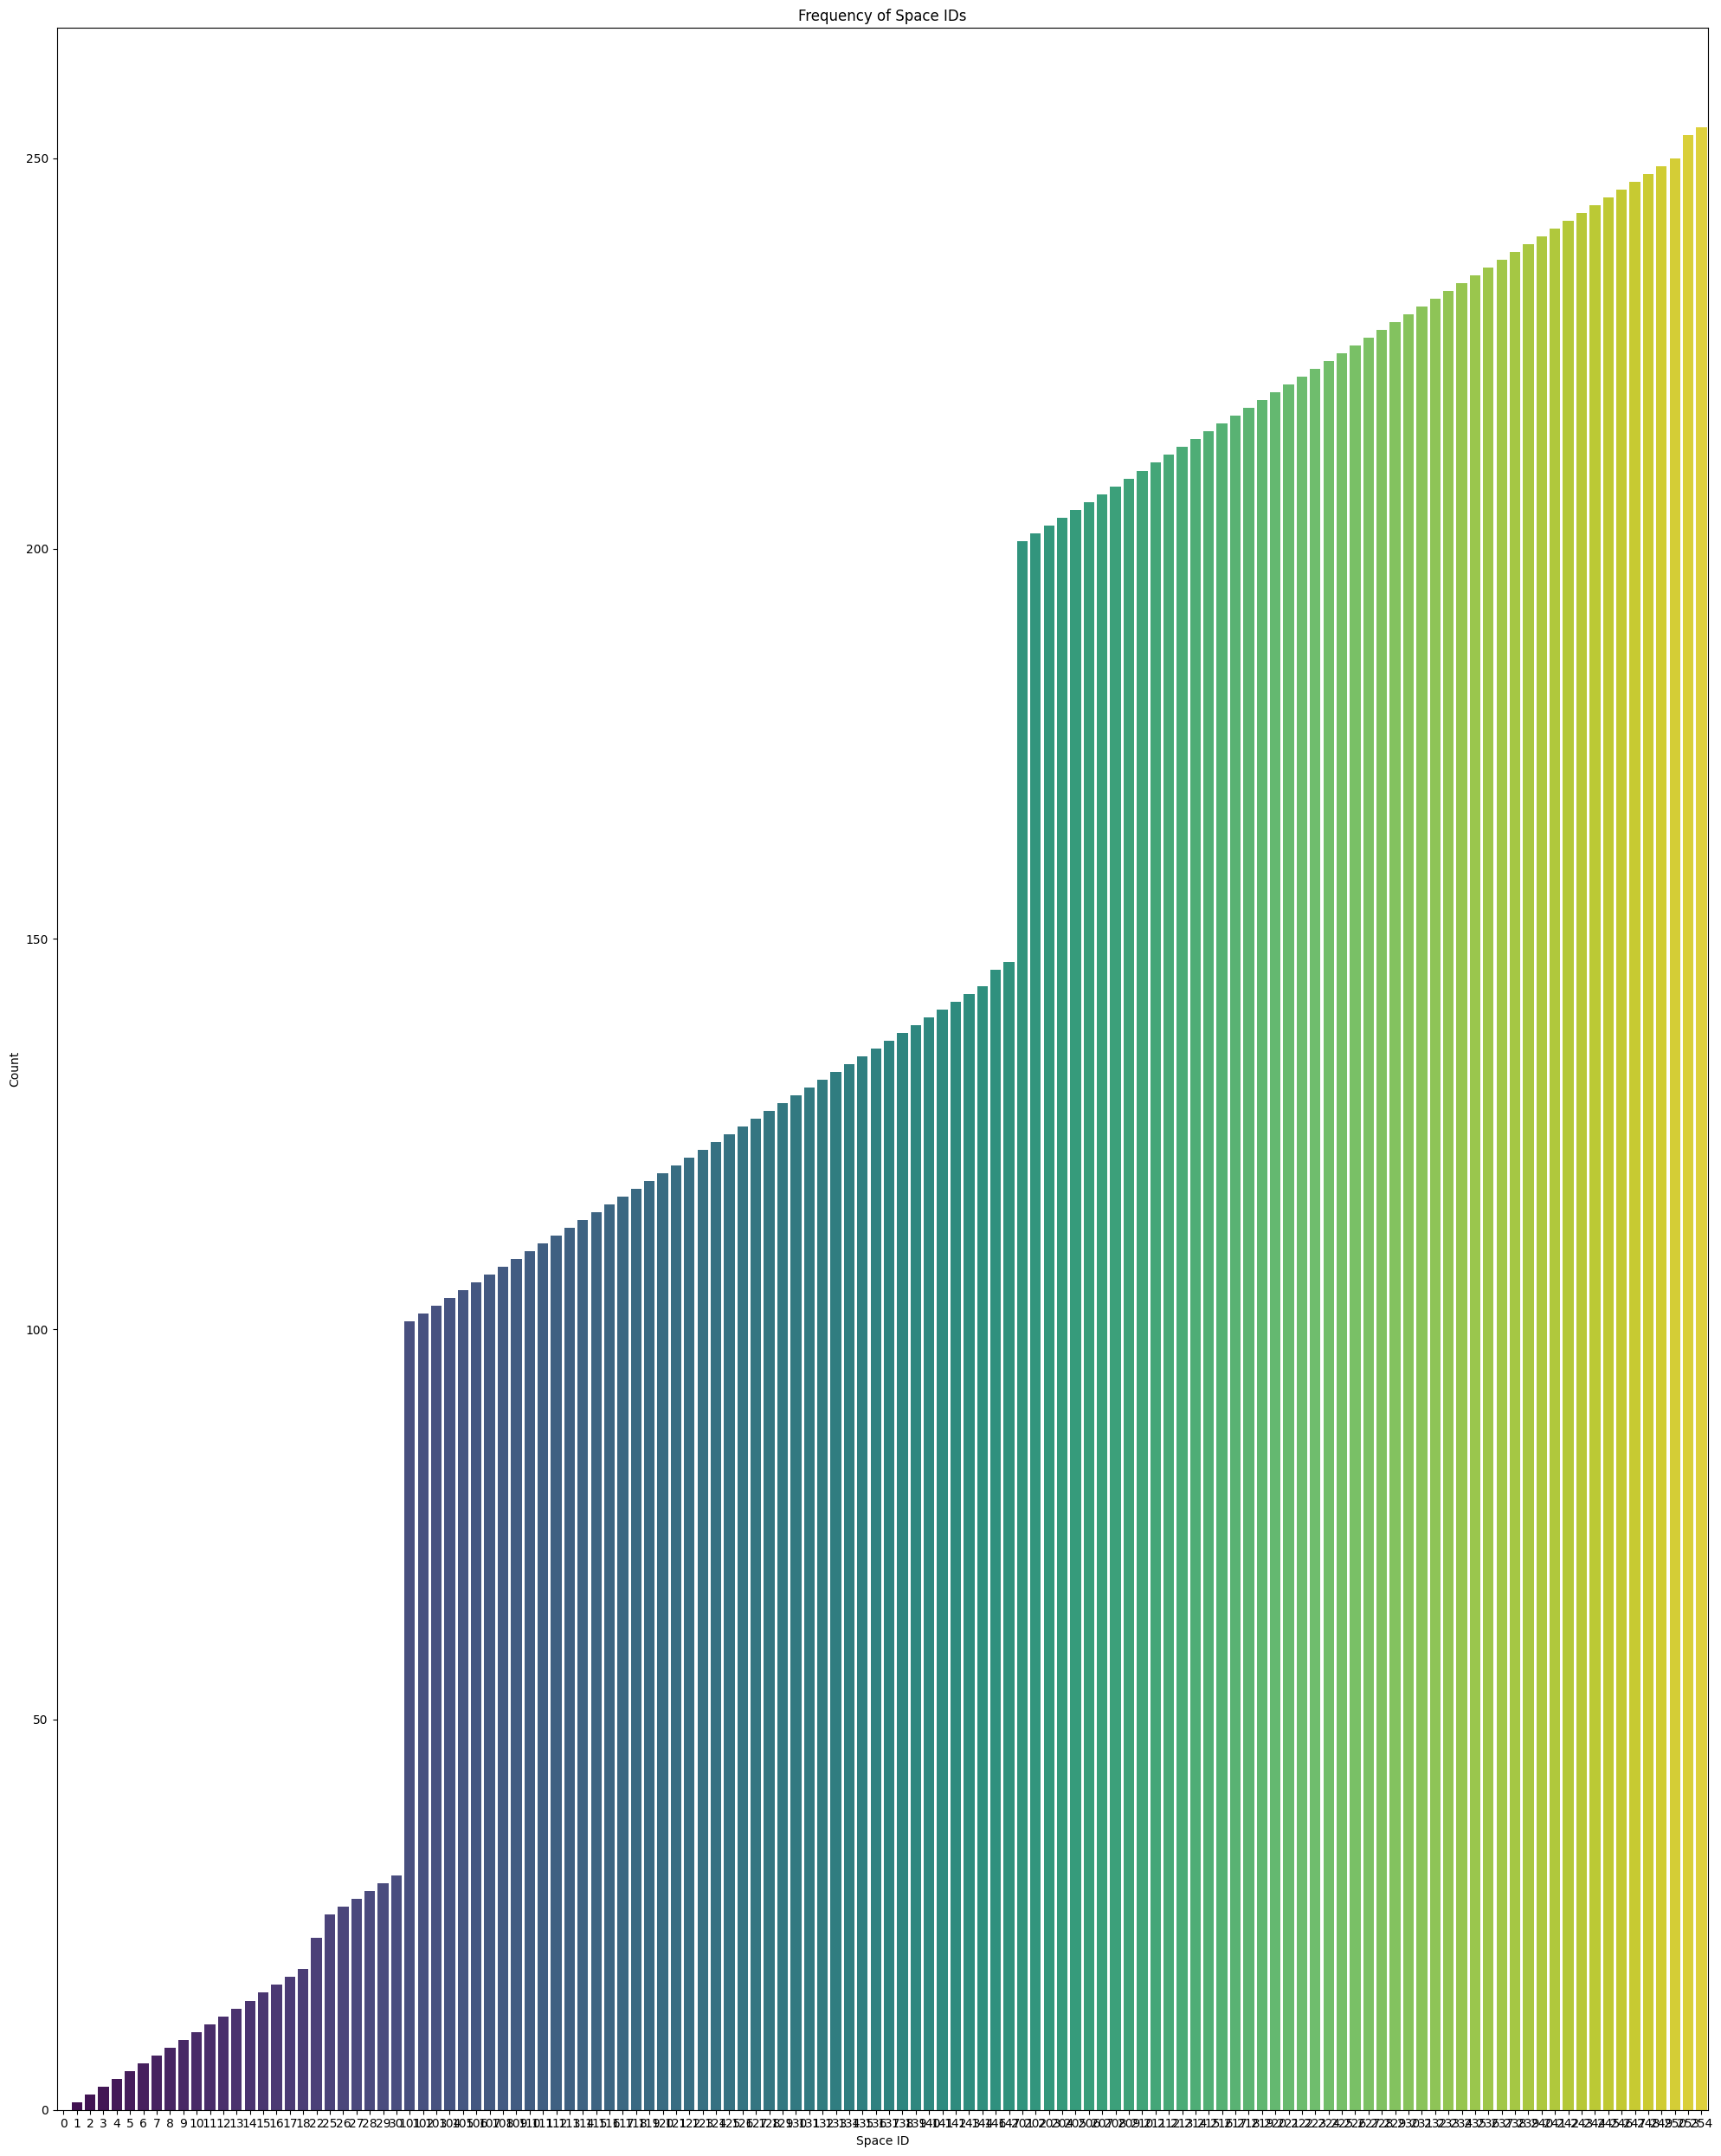

In [81]:
#Space ID Count
space_id_count = df_all['SPACEID'].sort_values().unique()

# Plotting using Seaborn
plt.figure(figsize=(20, 25))
sns.barplot(x=space_id_count, y=space_id_count, palette='viridis')
plt.xlabel('Space ID')
plt.ylabel('Count')
plt.title('Frequency of Space IDs')
plt.tight_layout()
plt.show()


In [73]:
#Relative Position Analysis
df_all.RELATIVEPOSITION.sort_values().unique()

array([0, 1, 2], dtype=int64)

<Axes: xlabel='RELATIVEPOSITION', ylabel='count'>

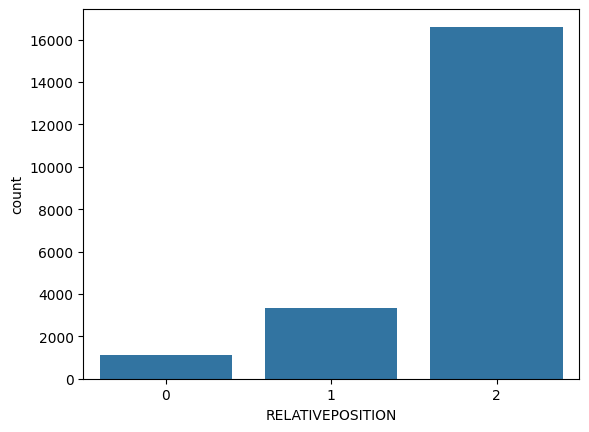

In [74]:
#Plotting
sns.countplot(x = 'RELATIVEPOSITION', data = df_all)

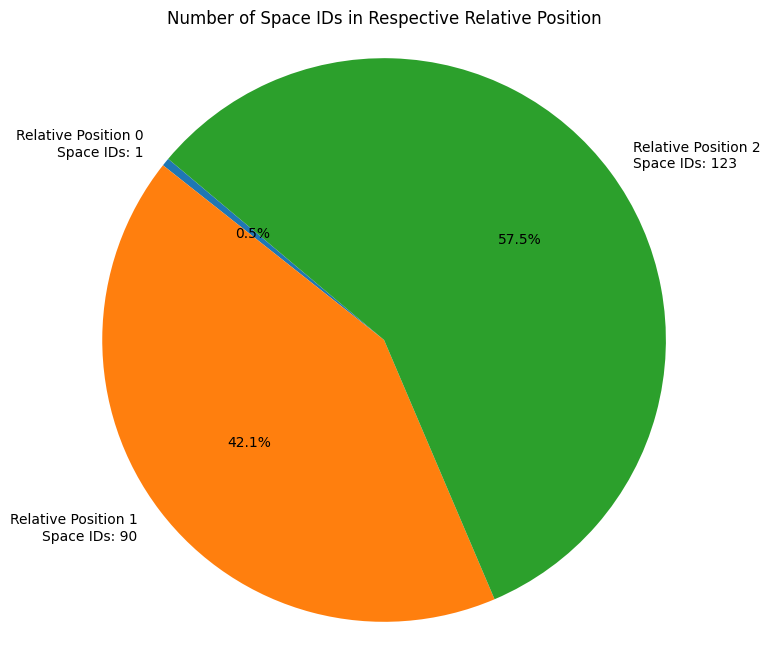

In [95]:
#Relative Position in Space ID
position_counts = df_all.groupby('RELATIVEPOSITION')['SPACEID'].nunique()

#Plotting
plt.figure(figsize=(8, 8))
plt.pie(position_counts, labels=position_counts.index.map(lambda x: f'Relative Position {x}\nSpace IDs: {position_counts[x]}'),
        autopct='%1.1f%%', startangle=140)
plt.title('Number of Space IDs in Respective Relative Position')
plt.axis('equal') 
plt.show()

**USER MOVEMENT ANALYSIS**

In [101]:
df_sorted = df_all.sort_values(by=['TIMESTAMP'])
temp = df_sorted.groupby('USERID')['BUILDINGID'].unique().sort_index()
print(f"list of buildings visited by each user:\n{temp}")

list of buildings visited by each user:
USERID
0     [0, 1, 2]
1           [0]
2        [1, 2]
3           [2]
4           [1]
5           [2]
6           [2]
7        [1, 2]
8        [1, 2]
9        [1, 2]
10       [1, 2]
11    [0, 1, 2]
12          [2]
13       [1, 2]
14       [1, 2]
15          [2]
16       [1, 2]
17       [1, 2]
18       [1, 2]
Name: BUILDINGID, dtype: object


In [98]:
#User Movement in Building 0

buil0 = df_sorted[df_sorted["BUILDINGID"] == 0]

In [99]:
buil0.groupby('FLOOR')["USERID"].unique()

FLOOR
0    [11, 1, 0]
1    [11, 1, 0]
2    [11, 1, 0]
3    [11, 1, 0]
Name: USERID, dtype: object

<Axes: xlabel='LATITUDE', ylabel='LONGITUDE'>

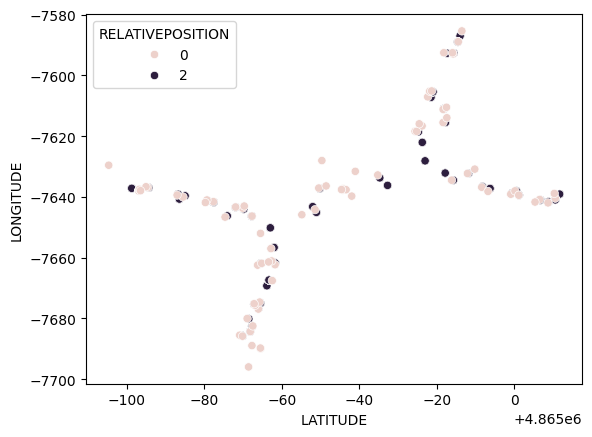

In [102]:
b0f0 = buil0[buil0['FLOOR'] == 0]
sns.scatterplot(x = 'LATITUDE', y = 'LONGITUDE',hue = 'RELATIVEPOSITION', data = b0f0)

<Axes: xlabel='LATITUDE', ylabel='LONGITUDE'>

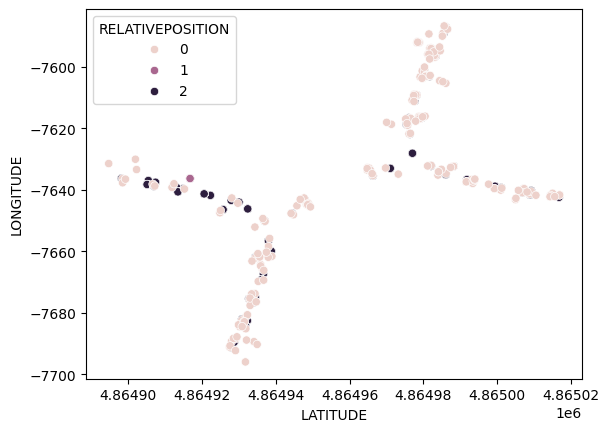

In [103]:
b0f1 = buil0[buil0['FLOOR'] == 1]
sns.scatterplot(x = 'LATITUDE', y = 'LONGITUDE',hue = 'RELATIVEPOSITION', data = b0f1)

<Axes: xlabel='LATITUDE', ylabel='LONGITUDE'>

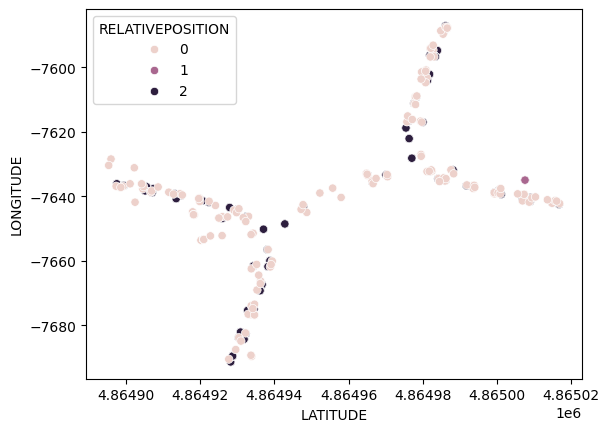

In [104]:
b0f2 = buil0[buil0['FLOOR'] == 2]
sns.scatterplot(x = 'LATITUDE', y = 'LONGITUDE',hue = 'RELATIVEPOSITION', data = b0f2)

<Axes: xlabel='LATITUDE', ylabel='LONGITUDE'>

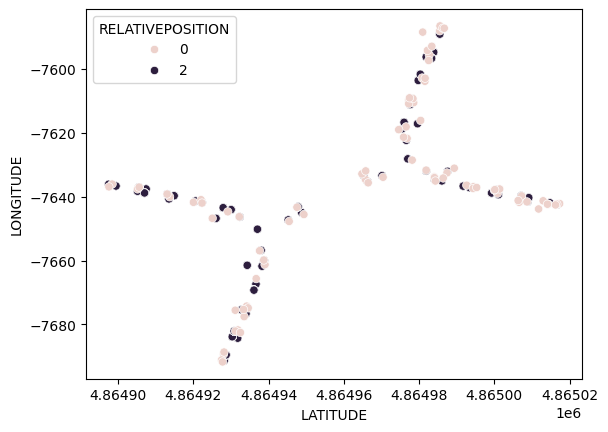

In [105]:
b0f3 = buil0[buil0['FLOOR'] == 3]
sns.scatterplot(x = 'LATITUDE', y = 'LONGITUDE',hue = 'RELATIVEPOSITION', data = b0f3)

In [106]:
#User Movement in Building 1

buil1 = df_sorted[df_sorted["BUILDINGID"] == 1]

<Axes: xlabel='LATITUDE', ylabel='LONGITUDE'>

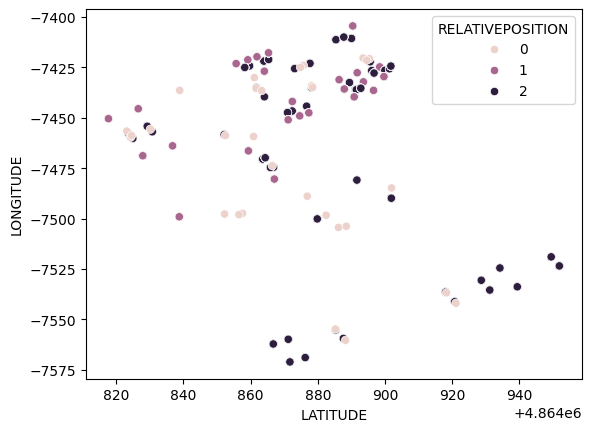

In [107]:
b1f0 = buil1[buil1['FLOOR'] == 0]
sns.scatterplot(x = 'LATITUDE', y = 'LONGITUDE',hue = 'RELATIVEPOSITION', data = b1f0)

<Axes: xlabel='LATITUDE', ylabel='LONGITUDE'>

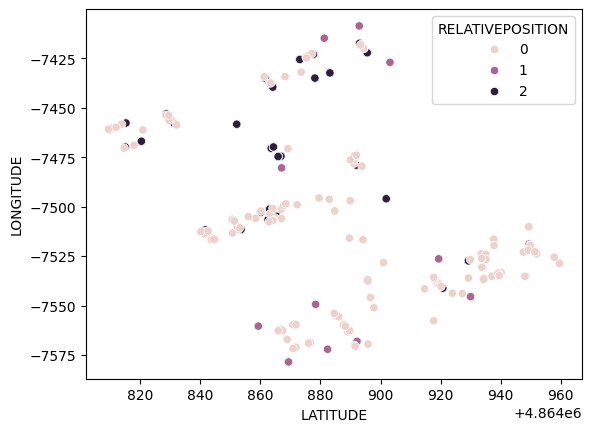

In [108]:
b1f1 = buil1[buil1['FLOOR'] == 1]
sns.scatterplot(x = 'LATITUDE', y = 'LONGITUDE',hue = 'RELATIVEPOSITION', data = b1f1)

<Axes: xlabel='LATITUDE', ylabel='LONGITUDE'>

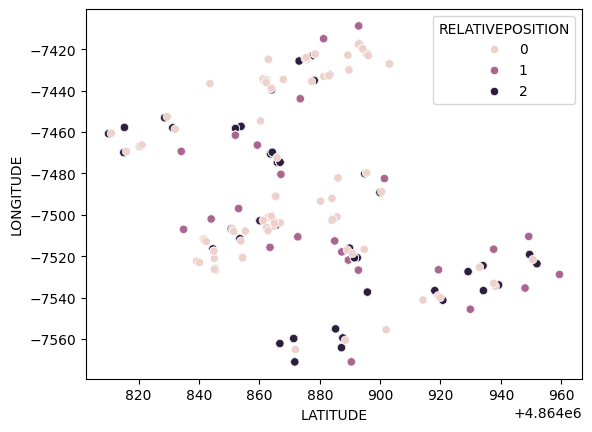

In [109]:
b1f2 = buil1[buil1['FLOOR'] == 2]
sns.scatterplot(x = 'LATITUDE', y = 'LONGITUDE',hue = 'RELATIVEPOSITION', data = b1f2)

<Axes: xlabel='LATITUDE', ylabel='LONGITUDE'>

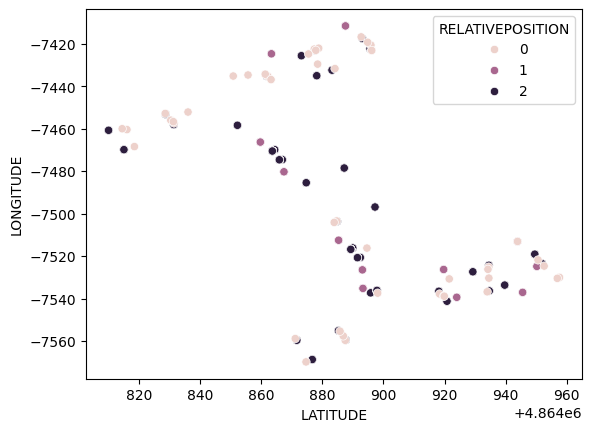

In [110]:
b1f3 = buil1[buil1['FLOOR'] == 3]
sns.scatterplot(x = 'LATITUDE', y = 'LONGITUDE',hue = 'RELATIVEPOSITION', data = b1f3)

In [112]:
# User Movement in Building 2

buil2 = df_sorted[df_sorted["BUILDINGID"] == 2]

<Axes: xlabel='LATITUDE', ylabel='LONGITUDE'>

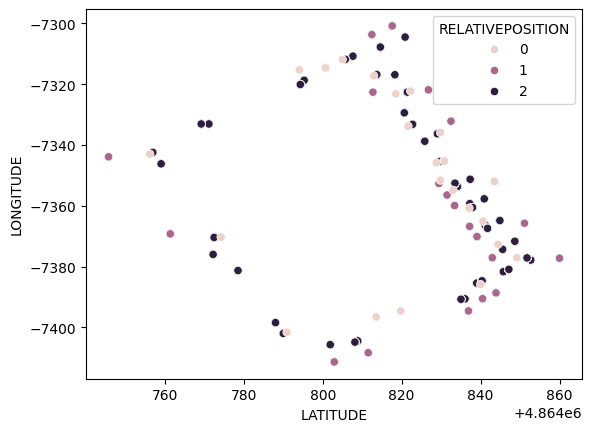

In [113]:
b2f0 = buil2[buil2['FLOOR'] == 0]
sns.scatterplot(x = 'LATITUDE', y = 'LONGITUDE',hue = 'RELATIVEPOSITION', data = b2f0)

<Axes: xlabel='LATITUDE', ylabel='LONGITUDE'>

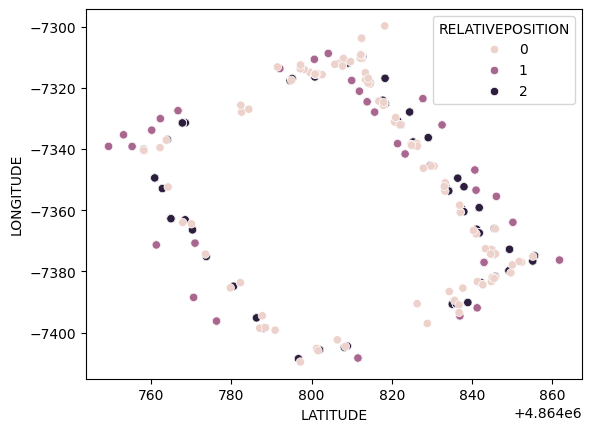

In [114]:
b2f1 = buil2[buil2['FLOOR'] == 1]
sns.scatterplot(x = 'LATITUDE', y = 'LONGITUDE',hue = 'RELATIVEPOSITION', data = b2f1)

<Axes: xlabel='LATITUDE', ylabel='LONGITUDE'>

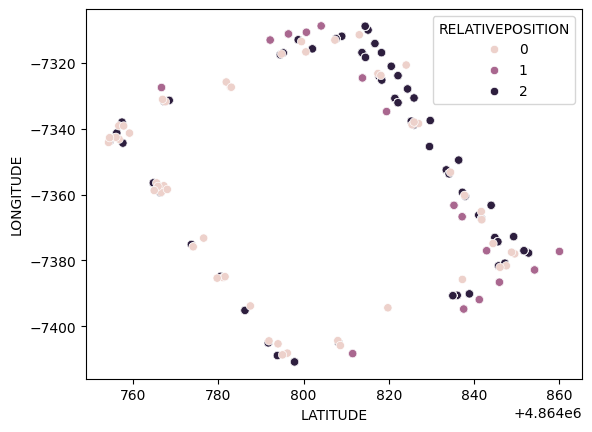

In [115]:
b2f2 = buil2[buil2['FLOOR'] == 2]
sns.scatterplot(x = 'LATITUDE', y = 'LONGITUDE',hue = 'RELATIVEPOSITION', data = b2f2)

<Axes: xlabel='LATITUDE', ylabel='LONGITUDE'>

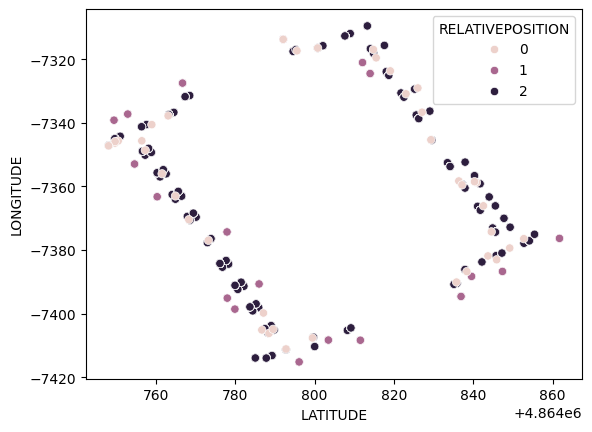

In [116]:
b2f3 = buil2[buil2['FLOOR'] == 3]
sns.scatterplot(x = 'LATITUDE', y = 'LONGITUDE',hue = 'RELATIVEPOSITION', data = b2f3)

<Axes: xlabel='LATITUDE', ylabel='LONGITUDE'>

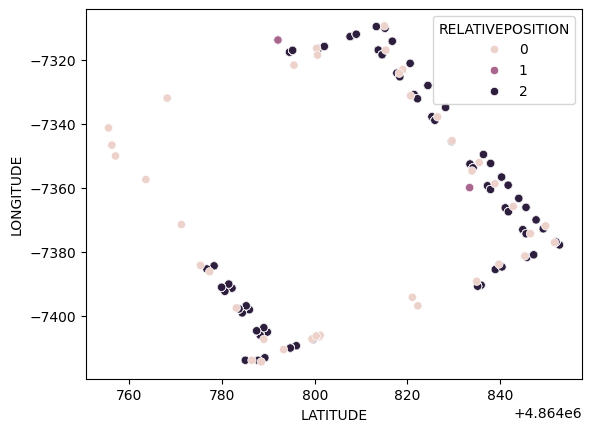

In [117]:
b2f4 = buil2[buil2['FLOOR'] == 4]
sns.scatterplot(x = 'LATITUDE', y = 'LONGITUDE',hue = 'RELATIVEPOSITION', data = b2f4)

**DATA NORMALIZATION**

In [60]:
# Droping Column

df_train.drop(columns = ["RELATIVEPOSITION", "USERID", "PHONEID", "TIMESTAMP"], inplace=True)
df_val.drop(columns = ["RELATIVEPOSITION", "USERID", "PHONEID", "TIMESTAMP"], inplace=True)

In [125]:
#Normalization Function

def normalize(x, xmin, xmax, a, b):
    numerator = x - xmin
    denominator = xmax - xmin
    multiplier = b - a
    ans = (numerator/denominator)*multiplier + a
    return ans

In [126]:

## WiFi Normalization

## If Wifi signals are present the wifi signals are in range(-104,0)
## If it is unreachable, it is represented by 100.
## So, we normalize it by converting the (-104,0) range to (0.25,1) and 100 to 0

#Normalization for RSSI values
print("Maximum RSSI Value:-",df_train.iloc[:, 0:520].min().min()) # -104
print("Minimum RSSI Value:-",df_train.iloc[:, 0:520].max().max()) # 100

sig_min = -104 
sig_max = 0
tar_min = 0.25
tar_max = 1.0
no_sig = 100
def normalize_wifi(num):
    ans = 0
    num = float(num)
    if math.isclose(num, no_sig, rel_tol=1e-3):  #If the RSSI value = no_signal ==> the value after normalized is 0
        return 0
    else:
        ans = normalize(num, sig_min, sig_max, tar_min, tar_max)
        return ans

Maximum RSSI Value:- -104
Minimum RSSI Value:- 100


In [127]:
wifi_cells_train = df_train.columns[:520]
wifi_cells_val = df_val.columns[:520]

In [128]:
# Normalize WiFi values
for i in wifi_cells_train:
    df_train[i] = df_train[i].apply(normalize_wifi)
    
for i in wifi_cells_val:
    df_val[i] = df_val[i].apply(normalize_wifi)

In [129]:
#Normalization for Latitude  
#print(df_train["LATITUDE"]) #Check values
print("Maximum Latitue:-",df_train["LATITUDE"].min()) #4864745.745015971
print("Minimum Latitude:-",df_train["LATITUDE"].max()) #4865016.687799998
lat_min = df_train["LATITUDE"].min()
lat_max = df_train["LATITUDE"].max()
tarmin = 0
tarmax = 1
def normalize_lat(num):
    num = float(num)
    ans = normalize(num, lat_min, lat_max, tarmin, tarmax)
    return ans

Maximum Latitue:- 4864745.745015971
Minimum Latitude:- 4865016.687799998


In [130]:
#Normalization for Longtitude
print("Minimum Longitude:-",df_train["LONGITUDE"].min()) #-7691.338399998844
print("Maximum Longitude:-",df_train["LONGITUDE"].max()) #-7300.818990092725
long_min = df_train["LONGITUDE"].min()
long_max = df_train["LONGITUDE"].max()
tarmin = 0
tarmax = 1
def normalize_long(num):
    num = float(num)
    ans = normalize(num, long_min, long_max, tarmin, tarmax)
    return ans

Minimum Longitude:- -7691.338399998844
Maximum Longitude:- -7300.818990092725


In [131]:
df_train["LATITUDE"] = df_train["LATITUDE"].apply(normalize_lat)
df_train["LONGITUDE"] = df_train["LONGITUDE"].apply(normalize_long)

df_val["LATITUDE"] = df_val["LATITUDE"].apply(normalize_lat)
df_val["LONGITUDE"] = df_val["LONGITUDE"].apply(normalize_long)

In [133]:
# Exporting Normalized Data to CSV

df_train.to_csv('TrainNormData.csv', index=False)
df_val.to_csv('ValNormData.csv', index=False)

# Print a confirmation message

print(f"Data exported successfully to: {'TrainNormData'}")
print(f"Data exported successfully to: {'ValNormData'}")

Data exported successfully to: TrainNormData
Data exported successfully to: ValNormData


**Spliting DATASET**

In [6]:
df_train_norm = pd.read_csv("E:\SEM 6\Minorproject\IndoorLocalization\TrainNormData.csv")
df_val_norm = pd.read_csv("E:\SEM 6\Minorproject\IndoorLocalization\ValNormData.csv")

In [5]:
df_train_norm.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID
0,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.384294,0.646015,2,1,106
1,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.396183,0.695646,2,1,106
2,0.0,0.0,0,0,0.0,0.0,0.0,0.300481,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.440915,0.752141,2,1,103
3,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.427042,0.695158,2,1,102
4,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.151580,0.872775,0,0,122


In [6]:
df_val_norm.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID
0,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.449201,0.531175,1,1,0
1,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.787339,0.346919,4,2,0
2,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.811832,0.371993,4,2,0
3,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.833540,0.358320,4,2,0
4,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.127623,0.651998,2,0,0


In [7]:
X_train = df_train_norm.iloc[:, 0:520]
X_val = df_val_norm.iloc[:, 0:520]
y_train = df_train_norm[["LATITUDE", "LONGITUDE", "BUILDINGID", "FLOOR"]]
y_val = df_val_norm[["LATITUDE", "LONGITUDE", "BUILDINGID", "FLOOR"]]

In [8]:
X_train

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0,0,0.0,0.0,0.0,0.300481,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19933,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19934,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19935,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [9]:
y_train

,LATITUDE,LONGITUDE,BUILDINGID,FLOOR
0,0.646015,0.384294,1,2
1,0.695646,0.396183,1,2
2,0.752141,0.440915,1,2
3,0.695158,0.427042,1,2
4,0.872775,0.151580,0,0
...,...,...,...,...
19932,0.476009,0.527169,1,3
19933,0.333320,0.770046,2,1
19934,0.529802,0.446833,1,3
19935,0.553736,0.394389,1,3


In [10]:
y_train.iloc[:,:2]

,LATITUDE,LONGITUDE
0,0.646015,0.384294
1,0.695646,0.396183
2,0.752141,0.440915
3,0.695158,0.427042
4,0.872775,0.151580
...,...,...
19932,0.476009,0.527169
19933,0.333320,0.770046
19934,0.529802,0.446833
19935,0.553736,0.394389


In [11]:
y_train.iloc[:,2:]

,BUILDINGID,FLOOR
0,1,2
1,1,2
2,1,2
3,1,2
4,0,0
...,...,...
19932,1,3
19933,2,1
19934,1,3
19935,1,3


**Machine Learning Model**

**Random Forest Model**

In [11]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.multioutput import MultiOutputRegressor, MultiOutputClassifier
from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix

# Create Random Forest Regressors and Classifiers
rfc = RandomForestClassifier(n_estimators=100, random_state=40)
rfr = RandomForestRegressor(n_estimators=100, random_state=40)

# Create MultiOutput Regressor and Classifier
mtl_rfr = MultiOutputRegressor(rfr)
mtl_rfc = MultiOutputClassifier(rfc)

In [13]:
# Training Model on Training Dataset
mtl_rfr.fit(X_train, y_train.iloc[:,:2])
mtl_rfc.fit(X_train, y_train.iloc[:,2:])

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=40))

In [14]:
# Predicting on Validation data
reg_out_rf = mtl_rfr.predict(X_val)
clf_out_rf = mtl_rfc.predict(X_val)

In [15]:
pred_building_rf = [x[0] for x in clf_out_rf]
pred_floor_rf = [x[1] for x in clf_out_rf]

pred_lat_rf = [x[0] for x in reg_out_rf]
pred_long_rf = [x[1] for x in reg_out_rf]

Classification report of Building Prediction

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       536
           1       1.00      1.00      1.00       307
           2       1.00      1.00      1.00       268

    accuracy                           1.00      1111
   macro avg       1.00      1.00      1.00      1111
weighted avg       1.00      1.00      1.00      1111




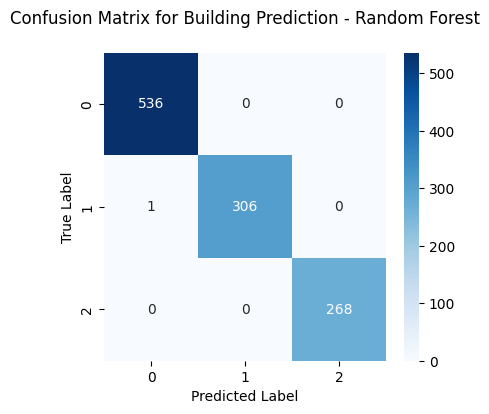

In [16]:
#Confusion Matrix for Building Prediction

conf_matrix_rf = confusion_matrix(y_val.BUILDINGID, pred_building_rf)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Confusion Matrix for Building Prediction - Random Forest\n')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

print("Classification report of Building Prediction")
print()
print(classification_report(y_val.BUILDINGID, pred_building_rf))
print()

Classification report of Floor Prediction

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       132
           1       0.96      0.89      0.92       462
           2       0.83      0.96      0.89       306
           3       0.90      0.96      0.93       172
           4       0.97      0.77      0.86        39

    accuracy                           0.91      1111
   macro avg       0.93      0.89      0.91      1111
weighted avg       0.92      0.91      0.91      1111



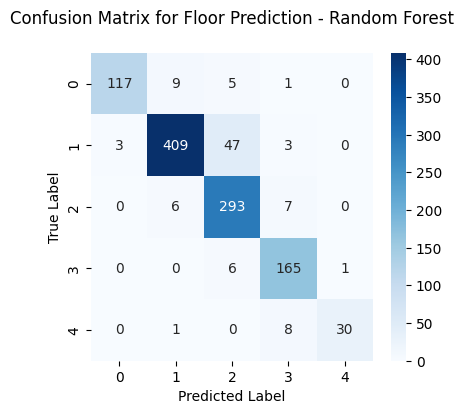

In [17]:
#Confusion Matrix for Floor Prediction

conf_matrix_rf = confusion_matrix(y_val.FLOOR, pred_floor_rf)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Confusion Matrix for Floor Prediction - Random Forest\n')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

print("Classification report of Floor Prediction")
print()
print(classification_report(y_val.FLOOR, pred_floor_rf))

In [18]:
print("MSE of latitude Prediction:- ", mean_squared_error(y_val.LATITUDE, pred_lat_rf))

print("MSE of longitude Prediction:- ", mean_squared_error(y_val.LONGITUDE, pred_long_rf))


MSE of latitude Prediction:-  0.002823285801223364
MSE of longitude Prediction:-  0.0013306212183854106


**SVM MODEL**

In [19]:
from sklearn.svm import SVC, SVR

svr = SVR()
svc = SVC()

mtl_svr = MultiOutputRegressor(svr)
mtl_svc = MultiOutputClassifier(svc)

# Train model

mtl_svr.fit(X_train, y_train.iloc[:,:2])
mtl_svc.fit(X_train, y_train.iloc[:,2:])

MultiOutputClassifier(estimator=SVC())

In [20]:
#Prediction

reg_out_svm = mtl_svr.predict(X_val)
clf_out_svm = mtl_svc.predict(X_val)

In [21]:
pred_building_svm = [x[0] for x in clf_out_svm]
pred_floor_svm = [x[1] for x in clf_out_svm]

pred_lat_svm = [x[0] for x in reg_out_svm]
pred_long_svm = [x[1] for x in reg_out_svm]


Classification report of Building Prediction

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       536
           1       0.99      1.00      1.00       307
           2       1.00      1.00      1.00       268

    accuracy                           1.00      1111
   macro avg       1.00      1.00      1.00      1111
weighted avg       1.00      1.00      1.00      1111




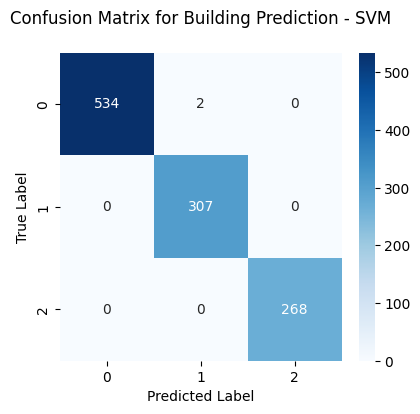

In [22]:
#Confusion Matrix for Building Prediction

conf_matrix_svm = confusion_matrix(y_val.BUILDINGID, pred_building_svm)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Confusion Matrix for Building Prediction - SVM\n')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

print("Classification report of Building Prediction")
print()
print(classification_report(y_val.BUILDINGID, pred_building_svm))
print()

Classification report of Floor Prediction

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       132
           1       0.96      0.88      0.92       462
           2       0.84      0.93      0.88       306
           3       0.88      0.93      0.90       172
           4       0.88      0.77      0.82        39

    accuracy                           0.90      1111
   macro avg       0.89      0.88      0.88      1111
weighted avg       0.90      0.90      0.90      1111



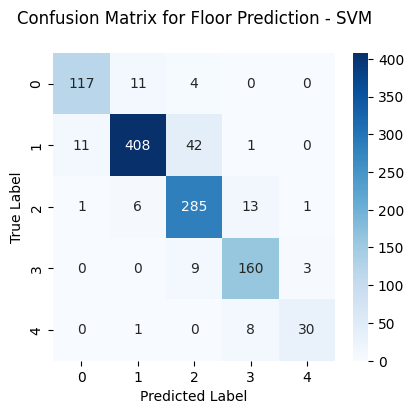

In [23]:
#Confusion Matrix for Floor Prediction

conf_matrix_svm = confusion_matrix(y_val.FLOOR, pred_floor_svm)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Confusion Matrix for Floor Prediction - SVM\n')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

print("Classification report of Floor Prediction")
print()
print(classification_report(y_val.FLOOR, pred_floor_svm))

In [24]:
print("MSE of latitude Prediction:- ", mean_squared_error(y_val.LATITUDE, pred_lat_svm))

print("MSE of longitude Prediction:- ", mean_squared_error(y_val.LONGITUDE, pred_long_svm))


MSE of latitude Prediction:-  0.004846882951790429
MSE of longitude Prediction:-  0.005550234140687514


**Gaussian Naive Bias Model**

In [25]:
from sklearn.naive_bayes import GaussianNB

# Instantiation
gnb_build = GaussianNB()
gnb_floor = GaussianNB()
# Training the classifier
gnb_build.fit(X_train, y_train.iloc[:,2])
gnb_floor.fit(X_train, y_train.iloc[:,3])

GaussianNB()

In [26]:
gnb_build_pred = gnb_build.predict(X_val)
gnb_floor_pred = gnb_floor.predict(X_val)

Classification report of Building Prediction

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       536
           1       1.00      1.00      1.00       307
           2       1.00      1.00      1.00       268

    accuracy                           1.00      1111
   macro avg       1.00      1.00      1.00      1111
weighted avg       1.00      1.00      1.00      1111




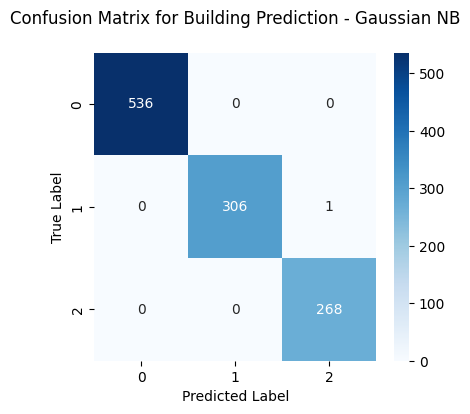

In [27]:
#Confusion Matrix for Building Prediction

conf_matrix_svm = confusion_matrix(y_val.BUILDINGID, gnb_build_pred)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Confusion Matrix for Building Prediction - Gaussian NB\n')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

print("Classification report of Building Prediction")
print()
print(classification_report(y_val.BUILDINGID, gnb_build_pred))
print()

Classification report of Floor Prediction

              precision    recall  f1-score   support

           0       0.32      0.82      0.46       132
           1       0.52      0.37      0.44       462
           2       0.50      0.27      0.35       306
           3       0.58      0.32      0.41       172
           4       0.20      0.90      0.33        39

    accuracy                           0.41      1111
   macro avg       0.42      0.54      0.40      1111
weighted avg       0.49      0.41      0.41      1111



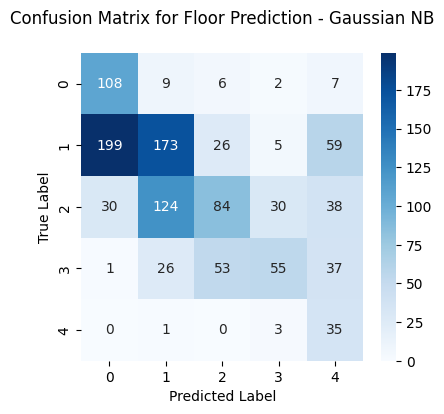

In [28]:
#Confusion Matrix for Floor Prediction

conf_matrix_svm = confusion_matrix(y_val.FLOOR, gnb_floor_pred)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Confusion Matrix for Floor Prediction - Gaussian NB\n')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

print("Classification report of Floor Prediction")
print()
print(classification_report(y_val.FLOOR, gnb_floor_pred))

**Kth Nearest Neighbour**

In [29]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

knn_clf = KNeighborsClassifier(n_neighbors=100)
knn_reg = KNeighborsRegressor(n_neighbors=100)

multi_knn_clf = MultiOutputClassifier(knn_clf)
multi_knn_reg = MultiOutputRegressor(knn_reg)

# Fitting the model
multi_knn_clf.fit(X_train, y_train.iloc[:,2:])
multi_knn_reg.fit(X_train, y_train.iloc[:, :2])  

MultiOutputRegressor(estimator=KNeighborsRegressor(n_neighbors=100))

In [30]:
clf_out_knn = multi_knn_clf.predict(X_val)
reg_out_knn = multi_knn_reg.predict(X_val)


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 966, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\subproces

In [31]:
pred_building_knn = [x[0] for x in clf_out_knn]
pred_floor_knn = [x[1] for x in clf_out_knn]

pred_lat_knn = [x[0] for x in reg_out_knn]
pred_long_knn = [x[1] for x in reg_out_knn]

Classification report of Building Prediction

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       536
           1       0.97      1.00      0.98       307
           2       0.99      0.98      0.99       268

    accuracy                           0.99      1111
   macro avg       0.99      0.99      0.99      1111
weighted avg       0.99      0.99      0.99      1111




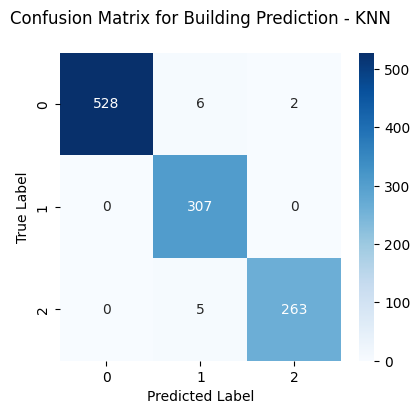

In [32]:
#Confusion Matrix for Building Prediction

conf_matrix_svm = confusion_matrix(y_val.BUILDINGID, pred_building_knn)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Confusion Matrix for Building Prediction - KNN\n')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

print("Classification report of Building Prediction")
print()
print(classification_report(y_val.BUILDINGID, pred_building_knn))
print()

Classification report of Floor Prediction

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       132
           1       0.96      0.79      0.87       462
           2       0.81      0.78      0.80       306
           3       0.66      0.98      0.79       172
           4       1.00      0.64      0.78        39

    accuracy                           0.82      1111
   macro avg       0.84      0.82      0.81      1111
weighted avg       0.85      0.82      0.83      1111



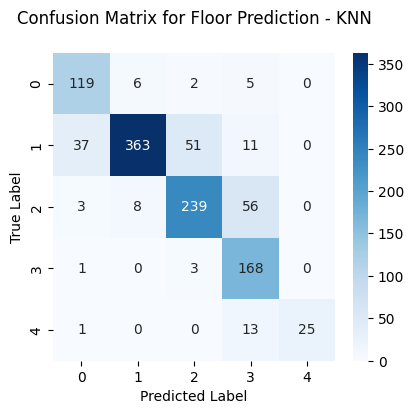

In [33]:
#Confusion Matrix for Floor Prediction

conf_matrix_svm = confusion_matrix(y_val.FLOOR, pred_floor_knn)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Confusion Matrix for Floor Prediction - KNN\n')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

print("Classification report of Floor Prediction")
print()
print(classification_report(y_val.FLOOR, pred_floor_knn))

In [34]:
print("MSE of latitude Prediction:- ", mean_squared_error(y_val.LATITUDE, pred_lat_knn))

print("MSE of longitude Prediction:- ", mean_squared_error(y_val.LONGITUDE, pred_long_knn))


MSE of latitude Prediction:-  0.0034299478162809626
MSE of longitude Prediction:-  0.0035724823482214357


**Logistic Regression**

In [35]:
from sklearn.linear_model import LogisticRegression

# Instantiation
log_reg_build = LogisticRegression()
log_reg_floor = LogisticRegression()

# Training the classifier
log_reg_build.fit(X_train, y_train.iloc[:, 2])
log_reg_floor.fit(X_train, y_train.iloc[:, 3])

LogisticRegression()

In [36]:

# Predictions
log_reg_build_pred = log_reg_build.predict(X_val)
log_reg_floor_pred = log_reg_floor.predict(X_val)

Classification report of Building Prediction

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       536
           1       1.00      1.00      1.00       307
           2       1.00      1.00      1.00       268

    accuracy                           1.00      1111
   macro avg       1.00      1.00      1.00      1111
weighted avg       1.00      1.00      1.00      1111




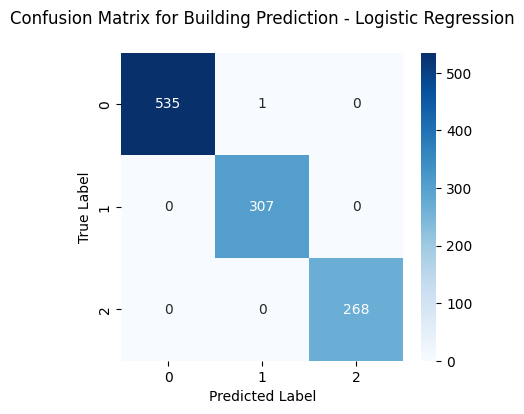

In [37]:
#Confusion Matrix for Building Prediction

conf_matrix_svm = confusion_matrix(y_val.BUILDINGID, log_reg_build_pred)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Confusion Matrix for Building Prediction - Logistic Regression\n')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

print("Classification report of Building Prediction")
print()
print(classification_report(y_val.BUILDINGID, log_reg_build_pred))
print()

Classification report of Floor Prediction

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       132
           1       0.95      0.85      0.90       462
           2       0.85      0.90      0.87       306
           3       0.84      0.92      0.88       172
           4       0.90      0.69      0.78        39

    accuracy                           0.88      1111
   macro avg       0.86      0.86      0.85      1111
weighted avg       0.88      0.88      0.88      1111



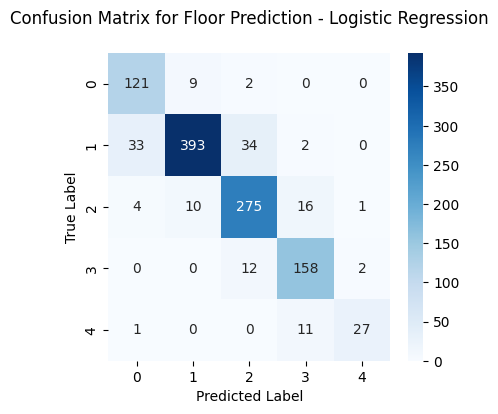

In [38]:
#Confusion Matrix for Floor Prediction

conf_matrix_svm = confusion_matrix(y_val.FLOOR, log_reg_floor_pred)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Confusion Matrix for Floor Prediction - Logistic Regression\n')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

print("Classification report of Floor Prediction")
print()
print(classification_report(y_val.FLOOR, log_reg_floor_pred))

**Linear Regression**

In [8]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train.iloc[:,:2])

y_pred = linear_reg.predict(X_val)

In [9]:
pred_lat_lreg = [x[0] for x in y_pred]
pred_long_lreg = [x[1] for x in y_pred]


In [12]:
print("MSE of latitude Prediction:- ", mean_squared_error(y_val.LATITUDE, pred_lat_lreg))

print("MSE of longitude Prediction:- ", mean_squared_error(y_val.LONGITUDE, pred_long_lreg))


MSE of latitude Prediction:-  8.957931120702725e+16
MSE of longitude Prediction:-  2.2303023073268596e+16


**XG Boost Model**

In [42]:
import xgboost as xg

# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 100, seed = 123)
xgb_c = xg.XGBClassifier()

mtl_xgbr = MultiOutputRegressor(xgb_r)
mtl_xgbc = MultiOutputClassifier(xgb_c)


mtl_xgbr.fit(X_train, y_train.iloc[:,:2])
mtl_xgbc.fit(X_train, y_train.iloc[:,2:])

c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [05:30:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [05:30:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))

In [43]:
reg_out_xgb = mtl_xgbr.predict(X_val)
clf_out_xgb = mtl_xgbc.predict(X_val)

In [44]:
pred_building_xgb = [x[0] for x in clf_out_xgb]
pred_floor_xgb = [x[1] for x in clf_out_xgb]

pred_lat_xgb = [x[0] for x in reg_out_xgb]
pred_long_xgb = [x[1] for x in reg_out_xgb]

Classification report of Building Prediction

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       536
           1       0.99      1.00      1.00       307
           2       1.00      1.00      1.00       268

    accuracy                           1.00      1111
   macro avg       1.00      1.00      1.00      1111
weighted avg       1.00      1.00      1.00      1111




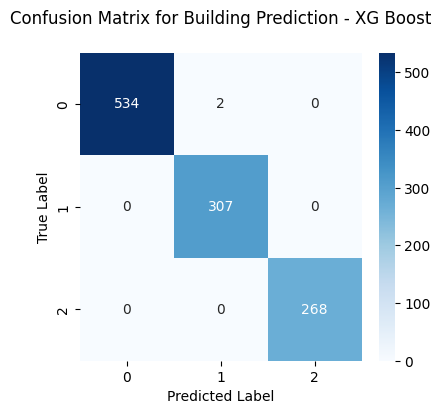

In [45]:
#Confusion Matrix for Building Prediction

conf_matrix_xgb = confusion_matrix(y_val.BUILDINGID, pred_building_xgb)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_xgb, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Confusion Matrix for Building Prediction - XG Boost\n')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

print("Classification report of Building Prediction")
print()
print(classification_report(y_val.BUILDINGID, pred_building_xgb))
print()

Classification report of Floor Prediction

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       132
           1       0.98      0.86      0.91       462
           2       0.84      0.95      0.89       306
           3       0.88      0.97      0.92       172
           4       1.00      0.82      0.90        39

    accuracy                           0.91      1111
   macro avg       0.92      0.91      0.91      1111
weighted avg       0.92      0.91      0.91      1111



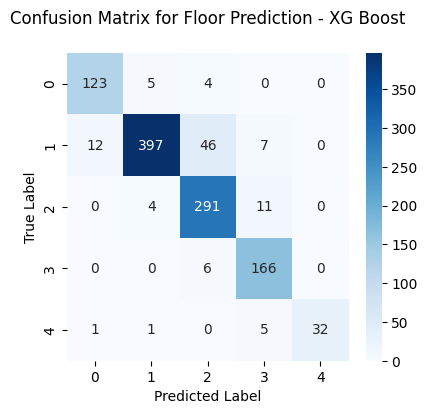

In [46]:
#Confusion Matrix for Floor Prediction

conf_matrix_xgb = confusion_matrix(y_val.FLOOR, pred_floor_xgb)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_xgb, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Confusion Matrix for Floor Prediction - XG Boost\n')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

print("Classification report of Floor Prediction")
print()
print(classification_report(y_val.FLOOR, pred_floor_xgb))

In [47]:
print("MSE of latitude Prediction:- ", mean_squared_error(y_val.LATITUDE, pred_lat_xgb))

print("MSE of longitude Prediction:- ", mean_squared_error(y_val.LONGITUDE, pred_long_xgb))


MSE of latitude Prediction:-  0.007104353236283542
MSE of longitude Prediction:-  0.008673913655972837


**Gradient Boost Model**

In [48]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

# Instantiation
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=40, learning_rate=0.15)
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=40, learning_rate=0.15)

mtl_gb_reg = MultiOutputRegressor(gb_reg)
mtl_gb_clf = MultiOutputClassifier(gb_clf)

# Training the models
mtl_gb_reg.fit(X_train, y_train.iloc[:,:2])
mtl_gb_clf.fit(X_train, y_train.iloc[:,2:])

MultiOutputClassifier(estimator=GradientBoostingClassifier(learning_rate=0.15,
                                                           random_state=40))

In [49]:
# Predictions
reg_out_gb = mtl_gb_reg.predict(X_val)
clf_out_gb = mtl_gb_clf.predict(X_val)

In [50]:
pred_building_gb = [x[0] for x in clf_out_gb]
pred_floor_gb = [x[1] for x in clf_out_gb]

pred_lat_gb = [x[0] for x in reg_out_gb]
pred_long_gb = [x[1] for x in reg_out_gb]

Classification report of Building Prediction

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       536
           1       1.00      1.00      1.00       307
           2       1.00      1.00      1.00       268

    accuracy                           1.00      1111
   macro avg       1.00      1.00      1.00      1111
weighted avg       1.00      1.00      1.00      1111




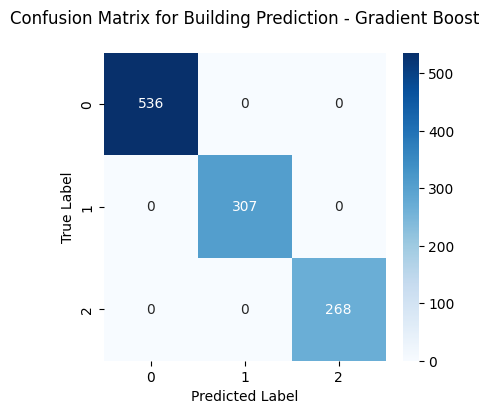

In [51]:
#Confusion Matrix for Building Prediction

conf_matrix_gb = confusion_matrix(y_val.BUILDINGID, pred_building_gb)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_gb, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Confusion Matrix for Building Prediction - Gradient Boost\n')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

print("Classification report of Building Prediction")
print()
print(classification_report(y_val.BUILDINGID, pred_building_gb))
print()

Classification report of Floor Prediction

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       132
           1       0.94      0.89      0.92       462
           2       0.84      0.93      0.88       306
           3       0.90      0.94      0.92       172
           4       0.91      0.79      0.85        39

    accuracy                           0.90      1111
   macro avg       0.91      0.88      0.89      1111
weighted avg       0.91      0.90      0.90      1111



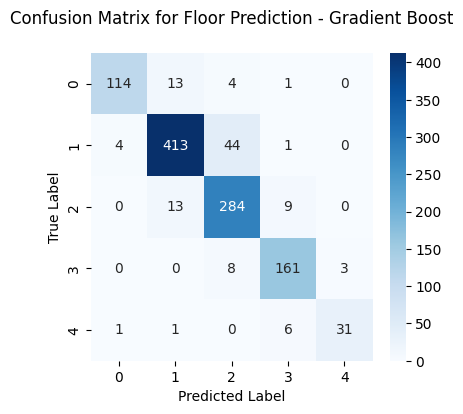

In [52]:
#Confusion Matrix for Floor Prediction

conf_matrix_gb = confusion_matrix(y_val.FLOOR, pred_floor_gb)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_gb, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Confusion Matrix for Floor Prediction - Gradient Boost\n')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

print("Classification report of Floor Prediction")
print()
print(classification_report(y_val.FLOOR, pred_floor_gb))

In [53]:
print("MSE of latitude Prediction:- ", mean_squared_error(y_val.LATITUDE, pred_lat_gb))

print("MSE of longitude Prediction:- ", mean_squared_error(y_val.LONGITUDE, pred_long_gb))


MSE of latitude Prediction:-  0.006387203718657975
MSE of longitude Prediction:-  0.007431012843188413


**ADA Boost Model**

In [54]:
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier

# Instantiation
ada_reg = AdaBoostRegressor(n_estimators=100, random_state=40, learning_rate=0.15)
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=40, learning_rate=0.15)

mtl_ada_reg = MultiOutputRegressor(ada_reg)
mtl_ada_clf = MultiOutputClassifier(ada_clf)

# Training the models
mtl_ada_reg.fit(X_train, y_train.iloc[:,:2])
mtl_ada_clf.fit(X_train, y_train.iloc[:,2:])

c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


MultiOutputClassifier(estimator=AdaBoostClassifier(learning_rate=0.15,
                                                   n_estimators=100,
                                                   random_state=40))

In [55]:
# Predictions
reg_out_ada = mtl_ada_reg.predict(X_val)
clf_out_ada = mtl_ada_clf.predict(X_val)

pred_building_ada = [x[0] for x in clf_out_ada]
pred_floor_ada = [x[1] for x in clf_out_ada]

pred_lat_ada = [x[0] for x in reg_out_ada]
pred_long_ada = [x[1] for x in reg_out_ada]

Classification report of Building Prediction

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       536
           1       0.99      0.97      0.98       307
           2       0.97      1.00      0.98       268

    accuracy                           0.99      1111
   macro avg       0.98      0.99      0.99      1111
weighted avg       0.99      0.99      0.99      1111




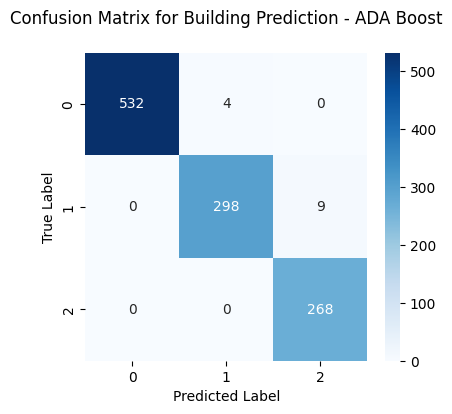

In [56]:
#Confusion Matrix for Building Prediction

conf_matrix_ada = confusion_matrix(y_val.BUILDINGID, pred_building_ada)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Confusion Matrix for Building Prediction - ADA Boost\n')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

print("Classification report of Building Prediction")
print()
print(classification_report(y_val.BUILDINGID, pred_building_ada))
print()

Classification report of Floor Prediction

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.60      0.86      0.71       462
           2       0.55      0.62      0.58       306
           3       0.43      0.22      0.29       172
           4       0.83      0.38      0.53        39

    accuracy                           0.58      1111
   macro avg       0.48      0.42      0.42      1111
weighted avg       0.50      0.58      0.52      1111



c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

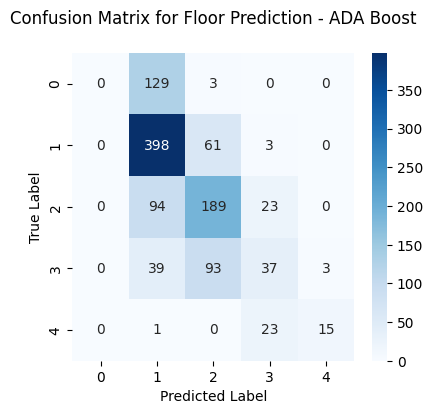

In [57]:
#Confusion Matrix for Floor Prediction

conf_matrix_ada = confusion_matrix(y_val.FLOOR, pred_floor_ada)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Confusion Matrix for Floor Prediction - ADA Boost\n')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

print("Classification report of Floor Prediction")
print()
print(classification_report(y_val.FLOOR, pred_floor_ada))

In [58]:
print("MSE of latitude Prediction:- ", mean_squared_error(y_val.LATITUDE, pred_lat_ada))

print("MSE of longitude Prediction:- ", mean_squared_error(y_val.LONGITUDE, pred_long_ada))


MSE of latitude Prediction:-  0.02204784986587881
MSE of longitude Prediction:-  0.033680546231124736
